In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("gun-violence-data.csv")

Before cleaning

In [3]:
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [4]:
data.shape

(239677, 29)

In [5]:
data.describe()

,incident_id,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district
count,2.396770e+05,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,5.593343e+05,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,2.931287e+05,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,9.211400e+04,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,3.085450e+05,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,5.435870e+05,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,8.172280e+05,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,1.083472e+06,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


from above, we can see that there is 29 attributes in this dataset. with 9 numerical attributes including the incident ID

this means that there should be more data cleaning/filterning/transformation is required in the other attributes, or more data mining methods are required.

but first we need to look into data more and remove null coloumns or values

In [6]:
data.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

there is alot of attributes that has "object" data type, these are strings.

In [7]:
data.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

Cleaning:
there are some attributes that we do not need in the study, either from the nature of the values captured, missing values, or the column as a whole

In [8]:
data.drop(["incident_url", "address", "congressional_district", "sources", "source_url", "incident_url_fields_missing",
              "location_description", "participant_relationship", "participant_name", "state_house_district",
              "state_senate_district", "notes"], axis=1, inplace=True)

null values in "Latitude" will be removed, and it will also remove the null in "longitude"

In [9]:
data = data[np.isfinite(data['latitude'])]

only 326 records are null in "incident_characteristics" so they will be removed

In [10]:
data = data[pd.notnull(data['incident_characteristics'])]

in the below columns, "0::Unknown" is a categorial value already in other records, so if its null, it will be filled with "0::Unknown".

n_guns_involved is the only numerical attribute in the data set, it will be filled with 0, and that will be filtered out in any analysis on number of guns involved.

In [11]:
data.gun_stolen.fillna("0::Unknown", inplace=True) #clean
data.gun_type.fillna("0::Unknown", inplace=True)
data.participant_age.fillna("0::Unknown", inplace=True)
data.participant_age_group.fillna("0::Unknown", inplace=True) #clean
data.participant_gender.fillna("0::Unknown", inplace=True) #clean
data.participant_status.fillna("0::Unknown", inplace=True)
data.participant_type.fillna("0::Unknown", inplace=True)
data.n_guns_involved.fillna(0, inplace=True)

converting date to datetime, by using datetime library

In [12]:
data['date'] = pd.to_datetime(data['date']) 

generating more attributes from date, to be used for further analysis

In [13]:
data["day"] = data["date"].dt.day
data["month"] = data["date"].dt.month
data["year"] = data["date"].dt.year
data["weekday"] = data["date"].dt.weekday
data["week"] = data["date"].dt.week
data["quarter"] = data["date"].dt.quarter
data['Day_of_year'] = data.date.dt.dayofyear

In [16]:
set(data.gun_stolen)

{'0::Not-stolen',
 '0::Not-stolen||1::Not-stolen',
 '0::Not-stolen||1::Not-stolen||2::Not-stolen',
 '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen',
 '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen',
 '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen',
 '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen||7::Not-stolen||8::Not-stolen',
 '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen||7::Not-stolen||8::Not-stolen||9::Not-stolen',
 '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::Not-stolen||7::Not-stolen||8::Not-stolen||9::Not-stolen||10::Not-stolen||11::Not-stolen||12::Not-stolen||13::Not-stolen||14::Not-stolen||15::Not-stolen||16::Not-stolen',
 '0::Not-stolen||1::Not-stolen||2::Not-stolen||3::Not-stolen||4::Not-stolen||5::Not-stolen||6::N

from above command, we can see that "gun_stolen" attribute has different type of values, we can know how many were stolen or not stolen, even though alot of them has the value of Unknown, but we can still get more information in terms of stolen against non stolen.

so the below command will add two attributes, stolen and not stolen counts for each recond depending on the number of guns involved in each incident

In [17]:
def clean_gun_stolen(row) :
    unknownCount = 0
    stolenCount = 0
    notstolenCount = 0
    gunstolen_row_values = []
    
    gunstolen_row = str(row).split("||")
    for x in gunstolen_row :
            gunstolen_row_value = str(x).split("::")
            if len(gunstolen_row_value) > 1 :
                gunstolen_row_values.append(gunstolen_row_value[1])
                if "Stolen" in gunstolen_row_value :
                    stolenCount += 1
                elif "Not-stolen" in gunstolen_row_value :
                    notstolenCount += 1
                else :
                    unknownCount += 1
                    
    return gunstolen_row_values


gunstolenvalues = data.gun_stolen.apply(clean_gun_stolen)
data["gun_stolen_Yes"] = gunstolenvalues.apply(lambda x: x.count("Stolen"))
data["gun_stolen_No"] = gunstolenvalues.apply(lambda x: x.count("Not-stolen"))
del(gunstolenvalues)

In [18]:
set(data.participant_gender)

{'0::Female',
 '0::Female||1::Female',
 '0::Female||1::Female||2::Female',
 '0::Female||1::Female||2::Female||3::Female',
 '0::Female||1::Female||2::Female||3::Female||4::Female',
 '0::Female||1::Female||2::Female||3::Female||4::Female||5::Female',
 '0::Female||1::Female||2::Female||3::Female||4::Female||5::Female||6::Female||7::Female||8::Female||9::Female||10::Male||11::Male||12::Male||13::Male||14::Male||15::Male||16::Male||17::Male||18::Male||19::Male||20::Male||21::Male||22::Male||23::Male||24::Male||25::Male',
 '0::Female||1::Female||2::Female||3::Female||4::Female||5::Male',
 '0::Female||1::Female||2::Female||3::Female||4::Female||5::Male||6::Female||7::Male',
 '0::Female||1::Female||2::Female||3::Female||4::Female||5::Male||6::Female||7::Male||8::Female||9::Female||10::Female||11::Male||12::Male||13::Female||14::Female||15::Female||16::Male||17::Female||18::Male||19::Female||20::Male||21::Female||22::Female||23::Male||24::Female||25::Male||26::Male||27::Male||28::Female||29::Ma

now we will clean "participant_gender" and create two attributes as a count for male and female for each record

the good thing here is that there is no or almost no Unknown values

In [19]:
def clean_participant_gender(row) :
    gender_row_values = []
    gender_row = str(row).split("||")
    for x in gender_row :
        gender_row_value = str(x).split("::")
        if len(gender_row_value) > 1 :
            gender_row_values.append(gender_row_value[1])
            
    return gender_row_values


participant_genders = data.participant_gender.apply(clean_participant_gender)
data["participant_gender_total"] = participant_genders.apply(lambda x: len(x))
data["participant_gender_male"] = participant_genders.apply(lambda x: x.count("Male"))
data["participant_gender_female"] = participant_genders.apply(lambda x: x.count("Female"))
del(participant_genders)

In [20]:
set(data.participant_age_group)

{'0::Adult 18+',
 '0::Adult 18+||1::Adult 18+',
 '0::Adult 18+||1::Adult 18+||2::Adult 18+',
 '0::Adult 18+||1::Adult 18+||2::Adult 18+||15::Adult 18+||16::Adult 18+',
 '0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+',
 '0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+',
 '0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+||5::Adult 18+',
 '0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+||5::Adult 18+||6::Adult 18+',
 '0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+||5::Adult 18+||6::Adult 18+||7::Adult 18+',
 '0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+||5::Adult 18+||6::Adult 18+||7::Adult 18+||11::Adult 18+',
 '0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+||5::Adult 18+||6::Adult 18+||7::Adult 18+||8::Adult 18+',
 '0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+||5::Adult 18+||6::Adult 18+||7::Adult 18+||8::Adult 18+||12::Adult 

age may vary, but in this study i'll focus on incidents for each age group. the data set has [Child 0-11, Teen 12-17, Adult 18+]

i will add a count for each person's age group for each incident

In [21]:
def clean_participant_age_group(row) :
    unknownCount = 0
    childCount = 0
    teenCount = 0
    adultCount = 0
    agegroup_row_values = []
    
    agegroup_row = str(row).split("||")
    for x in agegroup_row :
        agegroup_row_value = str(x).split("::")
        if len(agegroup_row_value) > 1 :
            agegroup_row_values.append(agegroup_row_value[1])
            if "Child 0-11" in agegroup_row_value :
                childCount += 1
            elif "Teen 12-17" in agegroup_row_value :
                teenCount += 1
            elif "Adult 18+" in agegroup_row_value :
                adultCount += 1
            else :
                unknownCount += 1
                
    return agegroup_row_values

agegroupvalues = data.participant_age_group.apply(clean_participant_age_group)
data["agegroup_child"] = agegroupvalues.apply(lambda x: x.count("Child 0-11"))
data["agegroup_teen"] = agegroupvalues.apply(lambda x: x.count("Teen 12-17"))
data["agegroup_adult"] = agegroupvalues.apply(lambda x: x.count("Adult 18+"))
del(agegroupvalues)

this is the cleaning for now. more cleaning might be applied to other attributes later, but i have a good number to start with

after cleaning:

now that we have cleaned some attributes, lets get a feel about our data

In [48]:
data.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_stolen,gun_type,incident_characteristics,latitude,...,Day_of_year,gun_stolen_Yes,gun_stolen_No,participant_gender_total,participant_gender_male,participant_gender_female,participant_gender_unknown,agegroup_child,agegroup_teen,agegroup_adult
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,0::Unknown,UNKOWN,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,...,1,0,0,4,3,1,0,0,0,5
1,460726,2013-01-01,California,Hawthorne,1,3,0::Unknown,UNKOWN,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,...,1,0,0,1,1,0,0,0,0,4
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,...,1,0,0,5,5,0,0,0,0,5
3,478925,2013-01-05,Colorado,Aurora,4,0,0::Unknown,UNKOWN,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,...,5,0,0,4,3,1,0,0,0,4
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,...,7,0,0,4,2,2,0,0,1,3


we can see from above that some null values were replaced by "0::Unkown". since its already an "object" data type; its ok to store have stings

In [49]:
data.shape

(231432, 33)

even though we have removed some attributes, the count increased! that because of the attributes we added during cleaning.

In [50]:
data.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,day,month,year,weekday,...,Day_of_year,gun_stolen_Yes,gun_stolen_No,participant_gender_total,participant_gender_male,participant_gender_female,participant_gender_unknown,agegroup_child,agegroup_teen,agegroup_adult
count,2.314320e+05,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,...,231432.000000,231432.000000,231432.00000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000
mean,5.517532e+05,0.246889,0.494059,37.546385,-89.338708,0.787428,15.762755,6.300758,2015.685156,3.056980,...,176.384186,0.071723,0.00767,1.590839,1.261360,0.175918,0.153557,0.018589,0.104502,1.247101
std,2.925288e+05,0.519319,0.731467,5.131248,14.363537,3.686783,8.830251,3.436619,1.225562,2.023258,...,105.026273,0.903420,0.12997,1.038363,1.069602,0.453806,0.360524,0.168104,0.412145,1.145302
min,9.211400e+04,0.000000,0.000000,19.111400,-171.429000,0.000000,1.000000,1.000000,2013.000000,0.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.010558e+05,0.000000,0.000000,33.903250,-94.160350,0.000000,8.000000,3.000000,2015.000000,1.000000,...,84.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.301345e+05,0.000000,0.000000,38.570100,-86.247850,1.000000,16.000000,6.000000,2016.000000,3.000000,...,176.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,8.123938e+05,0.000000,1.000000,41.435400,-80.045700,1.000000,23.000000,9.000000,2017.000000,5.000000,...,265.000000,0.000000,0.00000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.083466e+06,50.000000,53.000000,71.336800,97.433100,400.000000,31.000000,12.000000,2018.000000,6.000000,...,366.000000,70.000000,25.00000,78.000000,61.000000,23.000000,1.000000,11.000000,27.000000,103.000000


from above we see that there is 22 numerical attributes! thats a great sign for statistical analysis

In [51]:
data.dtypes

incident_id                            int64
date                          datetime64[ns]
state                                 object
city_or_county                        object
n_killed                               int64
n_injured                              int64
gun_stolen                            object
gun_type                              object
incident_characteristics              object
latitude                             float64
longitude                            float64
n_guns_involved                      float64
participant_age                       object
participant_age_group                 object
participant_gender                    object
participant_status                    object
participant_type                      object
day                                    int64
month                                  int64
year                                   int64
weekday                                int64
week                                   int64
quarter   

In [52]:
data.isnull().sum()

incident_id                   0
date                          0
state                         0
city_or_county                0
n_killed                      0
n_injured                     0
gun_stolen                    0
gun_type                      0
incident_characteristics      0
latitude                      0
longitude                     0
n_guns_involved               0
participant_age               0
participant_age_group         0
participant_gender            0
participant_status            0
participant_type              0
day                           0
month                         0
year                          0
weekday                       0
week                          0
quarter                       0
Day_of_year                   0
gun_stolen_Yes                0
gun_stolen_No                 0
participant_gender_total      0
participant_gender_male       0
participant_gender_female     0
participant_gender_unknown    0
agegroup_child                0
agegroup

Perfect! no null values

correlation matrix:

In [54]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,day,month,year,weekday,week,quarter,Day_of_year,gun_stolen_Yes,gun_stolen_No,participant_gender_total,participant_gender_male,participant_gender_female,participant_gender_unknown,agegroup_child,agegroup_teen,agegroup_adult
incident_id,1,0.00404716,0.0101705,0.0193502,-0.0169783,0.111376,0.0147328,0.0493219,0.963773,-0.00392271,0.0445249,0.0419701,0.0513137,0.0366232,-0.0122998,-0.0273263,-0.0240565,-0.0240479,0.022949,-0.023077,0.00947474,-0.0479336
n_killed,0.00404716,1,-0.119318,-0.0799939,-0.0621116,-0.0222636,0.000631959,-0.00472769,0.00271943,0.0225945,-0.00584904,-0.00666966,-0.00463018,-0.0337276,0.000753626,0.233127,0.201346,0.205723,-0.184858,0.0713171,0.0261837,0.277248
n_injured,0.0101705,-0.119318,1,-0.0114366,0.0368788,-0.0409994,0.00241286,0.0159446,0.00686654,0.057803,0.0158165,0.0163124,0.0160541,-0.0492032,-0.00699732,0.302204,0.270668,0.16881,-0.14512,0.0609879,0.107256,0.287223
latitude,0.0193502,-0.0799939,-0.0114366,1,-0.0570338,0.00942867,0.00526667,0.0153573,0.0151674,0.0203906,0.0158275,0.0149764,0.0156486,0.0023556,-0.000251128,-0.0439167,-0.0309145,-0.0331014,0.00688644,-0.0186019,-0.0056884,-0.0441777
longitude,-0.0169783,-0.0621116,0.0368788,-0.0570338,1,-0.0170949,0.00458138,0.00655544,-0.0159854,-0.000205922,0.00745019,0.00769391,0.00688121,-0.00341618,-0.00200948,-0.00446896,0.0022963,-0.0160156,0.00047423,-0.00537143,0.00633271,0.00352027
n_guns_involved,0.111376,-0.0222636,-0.0409994,0.00942867,-0.0170949,1,-0.000535882,0.00750213,0.106254,-0.00817916,0.00674379,0.00584234,0.00756789,0.240893,0.0265775,0.0179949,0.00926654,-0.00166979,0.0264404,-0.00418673,-3.11165e-05,0.00860239
day,0.0147328,0.000631959,0.00241286,0.00526667,0.00458138,-0.000535882,1,0.00784366,-0.00437796,-0.000155139,0.0620685,0.00836397,0.0916547,0.000756693,-0.00392269,-0.001151,-0.00179098,0.00186322,-0.00033905,-0.00193392,0.00255238,-0.00317949
month,0.0493219,-0.00472769,0.0159446,0.0153573,0.00655544,0.00750213,0.00784366,1,-0.168404,0.00830542,0.96735,0.971029,0.996454,0.00247969,-0.00852125,0.0242231,0.0238993,0.00420925,-0.0064565,-0.000612269,0.000677772,0.00509225
year,0.963773,0.00271943,0.00686654,0.0151674,-0.0159854,0.106254,-0.00437796,-0.168404,1,-0.00492653,-0.165911,-0.169115,-0.167022,0.0347296,-0.0100953,-0.0340477,-0.0297851,-0.026856,0.0241249,-0.0230399,0.00919182,-0.0523818
weekday,-0.00392271,0.0225945,0.057803,0.0203906,-0.000205922,-0.00817916,-0.000155139,0.00830542,-0.00492653,1,0.00872296,0.011416,0.00825344,-0.00678172,-0.00249992,0.00565933,0.00488075,0.00408096,-0.00331108,-0.000446274,-0.0086435,0.0137362


from the correlation matrix, we notice that most attributes do not have a correlation between each other, they are mostly blue!

some attributes have a higher correlation like month, week, quarter, and day of year; this requires more analysis!

male count for each incident has a high correlation with total count for participant gender; this means incidents mostly have males involved! also the count for males have a correlation with Adult age group; so most incidents are cause by adult males. this will get clarified with more analysis.

what states have the most incident count?!!

In [55]:
data.state.value_counts()

Illinois                16814
California              15975
Florida                 14610
Texas                   12980
Ohio                     9816
New York                 9487
Georgia                  8717
Pennsylvania             8568
North Carolina           8458
Louisiana                7727
Tennessee                7360
South Carolina           6743
Missouri                 6442
Massachusetts            5787
Michigan                 5760
Virginia                 5661
Maryland                 5641
Indiana                  5560
Alabama                  5373
New Jersey               5226
Wisconsin                4661
Kentucky                 4005
Mississippi              3495
Oklahoma                 3318
Washington               3309
District of Columbia     3091
Colorado                 3069
Connecticut              2984
Arkansas                 2753
Iowa                     2435
Minnesota                2276
Arizona                  2268
Oregon                   2217
Kansas    

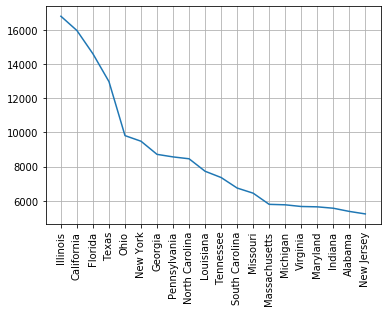

In [61]:
plt.plot(data.state.value_counts().head(20))
plt.xticks(rotation=90)
plt.grid()

what are the top 20 cities with the most incident count?!

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

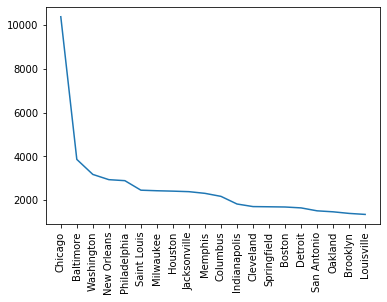

In [62]:
plt.plot(data.city_or_county.value_counts().head(20))
plt.xticks(rotation=90)

In [22]:
data.participant_gender_male.sum()

291919

In [34]:
data.participant_gender_female.sum()

40713

291919 males are involved in these incidents compared to 40713!!